## Thomson Sampling Algorithm

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the datasets

In [2]:
dataset = pd.read_csv('dataset/Ads_CTR_Optimisation.csv')

### Implementing Thompson Sampling

In [3]:
import random
N = 500
d = 10
ads_selected = []
numbers_of_reward_1 = [0] * d
numbers_of_reward_0 = [0] * d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_beta = random.betavariate(numbers_of_reward_1[i] + 1, numbers_of_reward_0[i] +1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_reward_1[ad] = numbers_of_reward_1[ad] + 1
    else:
        numbers_of_reward_0[ad] = numbers_of_reward_0[ad] + 1
    total_reward = total_reward + reward


### Visaulize the results

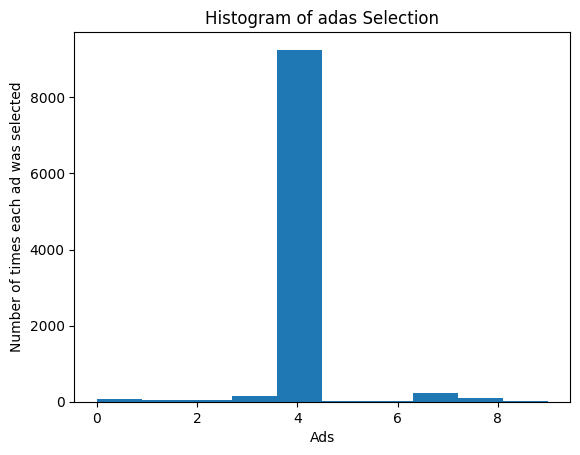

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of adas Selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()